# i. Perkenalan

````
==================================
Milestone 2

Nama  : Andhika Abdurachim Nafis
Batch : HCK-07

Program ini dilakukan untuk memenuhi Milestone 2, dan bertujuan untuk membuat model yang bisa memprediksi kemungkinan attrition karyawan di masa depan berdasarkan atribut-atribut yang ada dalam dataset.

==================================

````

## Problem Statement

Project ini bertujuan untuk merancang model predisi, menggunakan data dalam dataset IBM HR Analytics Attrition, mengenali faktor-faktor yang memengaruhi tingkat attrition (keluar) karyawan di perusahaan. Tingkat attrition yang tinggi dapat memiliki dampak negatif pada produktivitas perusahaan, biaya rekrutmen, dan kemampuan perusahaan untuk mempertahankan karyawan.

## Objective

Objektif yang ingin dicapai dengan membuat model ini adalah:
- Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap tingkat attrition (keluar) karyawan di perusahaan.

- Menganalisis pola dan tren dalam data untuk memahami perilaku karyawan yang cenderung meninggalkan perusahaan.

- Mengembangkan model prediktif yang dapat memprediksi kemungkinan attrition karyawan di masa depan berdasarkan atribut-atribut yang ada dalam dataset.


## Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
    - Latar Belakang: Latar belakang adanya teknik bagging (Bootstrap Aggregating) adalah untuk meningkatkan kinerja model dalam machine learning. Bagging digunakan ketika kita memiliki model dasar yang cenderung memiliki varian tinggi (sensitif terhadap perubahan data pelatihan).
    - Cara Kerja: Cara kerja bagging adalah dengan mengambil sampel acak (bootstrap) dari data pelatihan dengan penggantian dan melatih model dasar pada setiap sampel. Kemudian, hasil prediksi dari semua model dasar digabungkan untuk menghasilkan prediksi akhir yang lebih stabil.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
    - Random Forest: Random Forest adalah algoritma ensemble yang membangun banyak pohon keputusan secara independen.
    - AdaBoost: Adaboosting adalah algoritma ensemble yang membangun serangkaian model secara berurutan.
perbedaan utama adalah bahwa Random Forest membangun pohon-pohon secara independen dengan fitur yang dipilih secara acak, sementara Adaboosting membangun serangkaian model secara berurutan dengan memberikan bobot pada data yang salah diklasifikasikan untuk mengatasi kesalahan sebelumnya.

3. Jelaskan apa yang dimaksud dengan Cross Validation !
    - Cross Validation adalah suatu metode yang digunakan dalam machine learning untuk mengevaluasi kinerja model secara lebih akurat dan menghindari overfitting. Tujuannya adalah untuk membagi dataset menjadi dua bagian, yaitu data pelatihan (training data) dan data pengujian (testing data), dengan cara yang memungkinkan model untuk diuji pada data yang tidak pernah "dilihat" selama pelatihan.


# ii. Import Libraries

In [1]:
# Import library untuk analisis data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from imblearn.over_sampling import SMOTENC


# model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# Untuk membuat Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.compose import ColumnTransformer

# Untuk menyimpan model
import pickle

#Untuk mengabaikan fitur peringatan
import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

**Data Loading ini berisi proses memuat data, dimana kita ubah dari csv menjadi dataframe, agar bisa kita baca dan panggil dalam program vscode ini**

In [2]:
# Membuat Dataframe berisi tabel yang kita sudah import dari SQL
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Menunjukan 10 baris awal
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
# Menunjukan 10 baris akhir
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [4]:
# menghitung jumlah nilai unik (distinct)
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [5]:
# melihatkan shape/ukuran dari dataframe
df.shape

(1470, 35)

**Terdapat 1470 baris dan 35 kolom pada dataframe**

In [6]:
# menunjukan informasi mengenai data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Penjelasan Kolom:**

| Kolom                     | Penjelasan                                                                 |
|---------------------------|----------------------------------------------------------------------------|
| Age                       | Umur karyawan dalam tahun.                                                 |
| Attrition                 | Variabel target yang menunjukkan apakah seorang karyawan mengalami attrition (perpindahan) atau tidak (Yes/No). |
| BusinessTravel            | Tingkat frekuensi perjalanan bisnis (Travel_Rarely, Travel_Frequently, Non-Travel). |
| DailyRate                 | Gaji harian karyawan.                                                     |
| Department                | Departemen di mana karyawan bekerja (Sales, Research & Development, Human Resources). |
| DistanceFromHome          | Jarak rumah karyawan ke lokasi kerja dalam mil.                            |
| Education                 | Tingkat pendidikan (1: 'Below College,' 2: 'College,' 3: 'Bachelor,' 4: 'Master,' 5: 'Doctor'). |
| EducationField            | Bidang pendidikan karyawan (Contoh: 'Life Sciences,' 'Medical,' 'Marketing'). |
| EmployeeCount             | Jumlah karyawan dalam dataset ini (konstan, karena semua baris memiliki nilai 1). |
| EmployeeNumber            | Nomor identifikasi unik untuk setiap karyawan.                            |
| EnvironmentSatisfaction   | Kepuasan karyawan terhadap lingkungan kerja (1: 'Low,' 2: 'Medium,' 3: 'High,' 4: 'Very High'). |
| Gender                    | Jenis kelamin karyawan (Male, Female).                                     |
| HourlyRate                | Gaji per jam karyawan.                                                    |
| JobInvolvement            | Tingkat keterlibatan karyawan dalam pekerjaan (1: 'Low,' 2: 'Medium,' 3: 'High,' 4: 'Very High'). |
| JobLevel                  | Tingkat jabatan karyawan (1 hingga 5, dengan 5 sebagai jabatan tertinggi). |
| JobRole                   | Peran atau posisi pekerjaan karyawan (Contoh: 'Sales Executive,' 'Research Scientist,' 'Human Resources'). |
| JobSatisfaction           | Kepuasan karyawan terhadap pekerjaan (1: 'Low,' 2: 'Medium,' 3: 'High,' 4: 'Very High'). |
| MaritalStatus             | Status perkawinan karyawan (Single, Married, Divorced).                     |
| MonthlyIncome             | Pendapatan bulanan karyawan dalam mata uang lokal.                         |
| MonthlyRate               | Tingkat bulanan karyawan.                                                 |
| NumCompaniesWorked        | Jumlah perusahaan tempat karyawan sebelumnya bekerja.                     |
| Over18                    | Indikasi apakah karyawan berusia di atas 18 tahun (Y/N).                   |
| OverTime                  | Apakah karyawan bekerja lembur atau tidak (Yes/No).                        |
| PercentSalaryHike         | Persentase kenaikan gaji terakhir.                                        |
| PerformanceRating         | Penilaian kinerja karyawan (1: 'Bad,' 2: 'Good).                           |
| RelationshipSatisfaction  | Kepuasan karyawan terhadap hubungan dengan rekan kerja (1: 'Low,' 2: 'Medium,' 3: 'High,' 4: 'Very High'). |
| StandardHours             | Standar jam kerja perusahaan (konstan, karena semua baris memiliki nilai 80). |
| StockOptionLevel          | Tingkat opsi saham yang dimiliki karyawan.                                |
| TotalWorkingYears         | Total tahun kerja karyawan.                                               |
| TrainingTimesLastYear     | Jumlah pelatihan yang diikuti karyawan dalam setahun.                     |
| WorkLifeBalance           | Keseimbangan antara pekerjaan dan kehidupan pribadi karyawan (1: 'Bad,' 2: 'Good,' 3: 'Better,' 4: 'Best'). |
| YearsAtCompany            | Jumlah tahun karyawan bekerja di perusahaan saat ini.                     |


# iv. EDA

**Untuk EDA kita bisa:**
- Cek Duplikasi Data
- Cek Missing Value, cuma analisis aja, jangan di handling
- Data Cleaning
- Cek Distribusi Data/Korelasi
- Visualisasi Data

ubah: 
EnvironmentSatisfaction (1: 'Low,' 2: 'Medium,' 3: 'High,' 4: 'Very High')
Education (1: 'Below College,' 2: 'College,' 3: 'Bachelor,' 4: 'Master,' 5: 'Doctor')
JobInvolvement (1: 'Low,' 2: 'Medium,' 3: 'High,' 4: 'Very High')
PerformanceRating (1: 'Bad,' 2: 'Good)
WorkLifeBalance  (1: 'Bad,' 2: 'Good,' 3: 'Better,' 4: 'Best')
RelationshipSatisfaction (1: 'Low,' 2: 'Medium,' 3: 'High,' 4: 'Very High')

In [7]:
# Memunculkan value dari kolom yang memiliki data type object
df.value_counts()

Age  Attrition  BusinessTravel  DailyRate  Department              DistanceFromHome  Education  EducationField    EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole                JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
18   No         Non-Travel      287        Research & Development  5                 2          Life Sciences     1              1012            2                        Male    73          3               1         Research Scientist     4                Single         1051           13493        1                   Y       No        15                 3                  4                         80             0        

**General Observation Mengenai Dataset:**

Setelah memeriksa nilai-nilai yang ada di setiap kolom, kami memiliki beberapa pengamatan berikut:

- Data hanya disediakan untuk tiga departemen: 'Sales,' 'Research & Development,' dan 'Human Resources.'
- Beberapa variabel dikode dengan angka, tetapi mereka mewakili data ordinal. Misalnya, tingkat pendidikan dikode sebagai 1, 2, 3, 4, atau 5.
- 'Employee Count' dan 'Employee Number' adalah identifier, sehingga dapat di drop.
- 'Over18' juga hanya memiliki satu nilai, sehingga dapat diabaikan/dihapus dari analisis.
- 'Standard Hours' hanya memiliki satu nilai, yaitu 80, sehingga saya akan drop kolom ini.

Secara keseluruhan, dataset ini tampak bersih tanpa adanya nilai yang hilang atau duplikat. di prosess kedepannya akan menghapus variabel yang tidak perlu.

## Duplikasi Data

In [8]:
# Melihat duplikasi pada data
df[df.duplicated()].shape

(0, 35)

In [9]:
# Menunjukan persentase data duplikasi
print('{} of data is duplicated rows'.format(
    str(round(df.duplicated().sum() / df.size * 100,5))+'%'))
print('')
print('jumlah duplicate row:', df.duplicated().sum())

0.0% of data is duplicated rows

jumlah duplicate row: 0


**Tidak terdapat data duplikasi**

## Missing Value

**Pada tahap Missing Value, kita akan melihat apakah data kita ini memiliki Missing Value**

In [10]:
# melihat missing value pada data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
# Menunjukan persentase missing value pada data
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Age,Age,0.0
Attrition,Attrition,0.0
BusinessTravel,BusinessTravel,0.0
DailyRate,DailyRate,0.0
Department,Department,0.0
DistanceFromHome,DistanceFromHome,0.0
Education,Education,0.0
EducationField,EducationField,0.0
EmployeeCount,EmployeeCount,0.0
EmployeeNumber,EmployeeNumber,0.0


**Tidak terdapat Missing Value pada Data kita, maka tidak akan ada imputasi data kedepan nya**

## Visualisasi Data

### **Perbandingan Value Rata Rata dari Karyawan yang Keluar (Attired) dan Bertahan (Retained)**

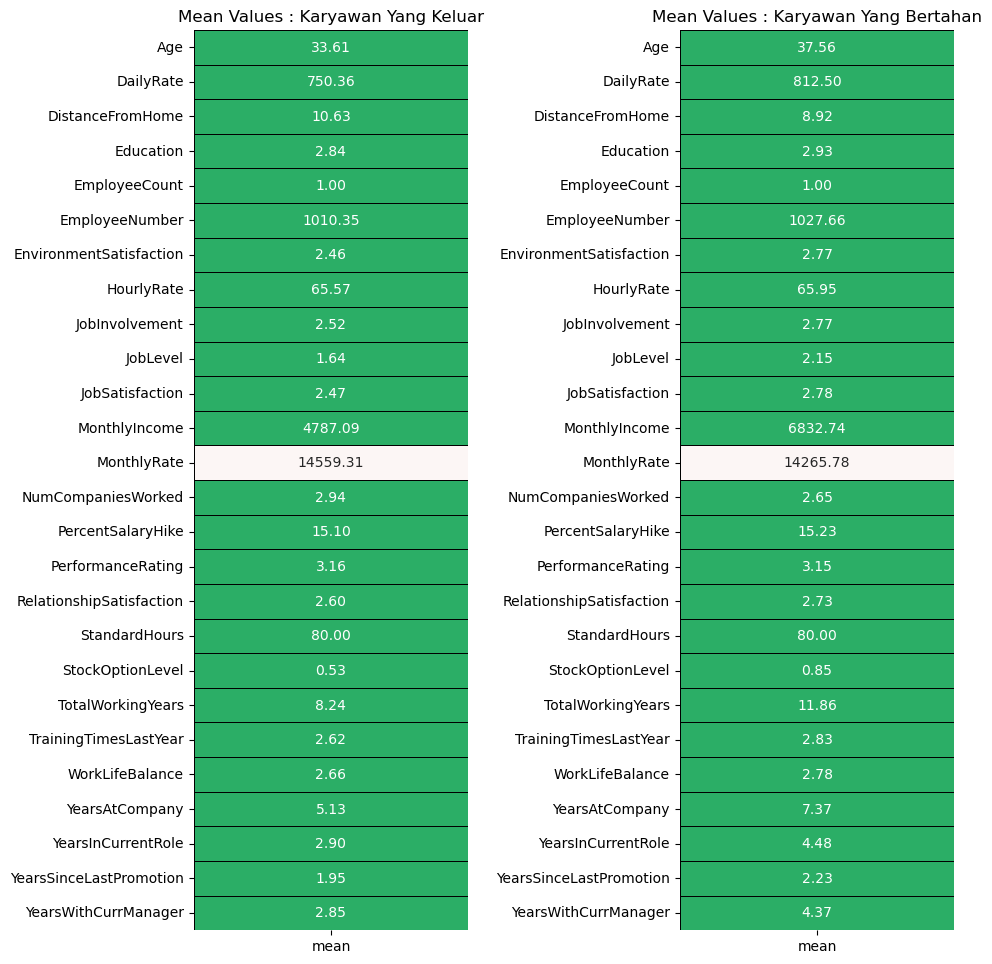

In [12]:
yes = df[df['Attrition'] == 'Yes'].describe().T
no = df[df['Attrition'] == 'No'].describe().T

colors = ['#2BAE66','#FCF6F5']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean Values : Karyawan Yang Keluar');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean Values : Karyawan Yang Bertahan');

fig.tight_layout(pad = 2)

Kesimpulan:

- Karyawan yang bertahan memiliki value yang tinggi pada kolom: TotalWorkingYears, YearsAtCompany, YearsInCurrentRole & YearsWithCurrManager.

### **Persentase Attrition**

Text(0.5, 1.0, 'Attrition percentage')

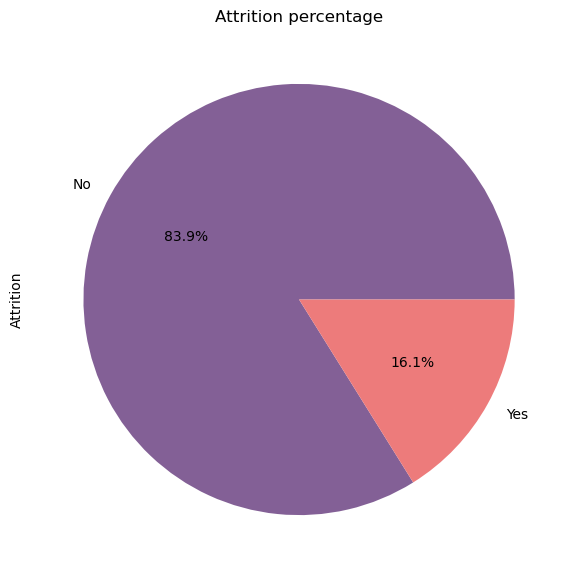

In [13]:
plt.figure(figsize=(7,7))
(df['Attrition'].value_counts()).plot.pie(autopct = "%1.1f%%", colors=['#836096', '#ED7B7B'])
plt.title('Attrition percentage')

Kesimpulan:

- Mayoritas dari karyawan perusahaan ini Bertahan pada perusahaan, dan hanya minoritas yang memilih untuk Keluar/Berhenti dari perusahaan

### Apakah ada hubungan antara Attrition dengan Gender

Text(0.5, 1.0, 'Gender percentage')

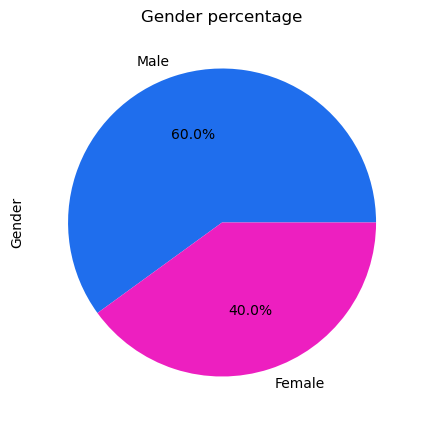

In [14]:
plt.figure(figsize=(5,5,))
(df['Gender'].value_counts()).plot.pie(autopct = "%1.1f%%", colors=['#1f6eed', '#ed1fc0'])
plt.title('Gender percentage')

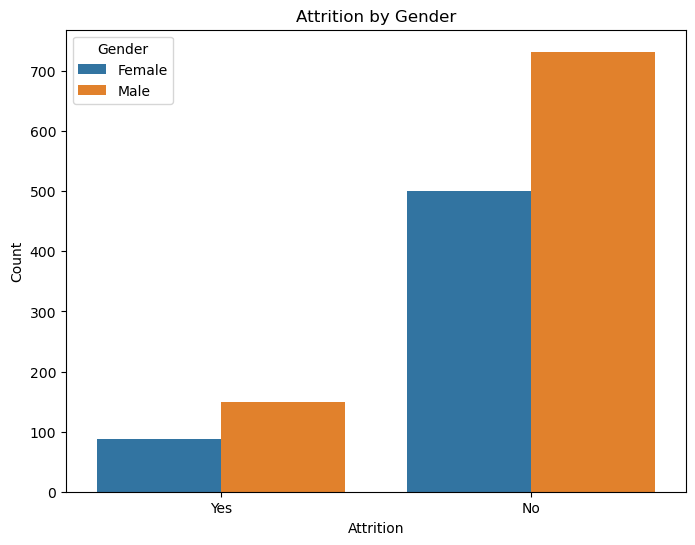

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Attrition', hue='Gender')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition by Gender')
plt.show()

- Mayoritas (60%) karyawan adalah Pria

- Karyawan laki laki lebih cenderung untuk bertahan di perusahaan di banding dengan karyawan wanita.


### Apakah Attrition dipengaruhi oleh Education?

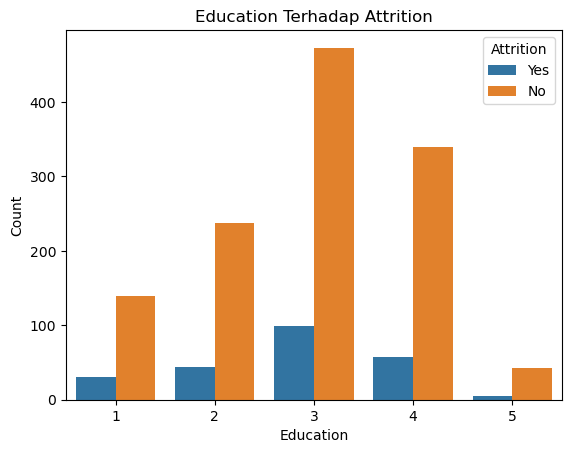

In [16]:
sns.countplot(data=df, x='Education', hue='Attrition')

plt.title('Education Terhadap Attrition')
plt.xlabel('Education')
plt.ylabel('Count')

plt.show()

**1: 'Below College,' 2: 'College,' 3: 'Bachelor,' 4: 'Master,' 5: 'Doctor')**

- Karyawan dengan level Edukasi 3/Bachelor memiliki tinggal Attration yang kecil



### Apakah Attrition dipengaruhi oleh usia ?

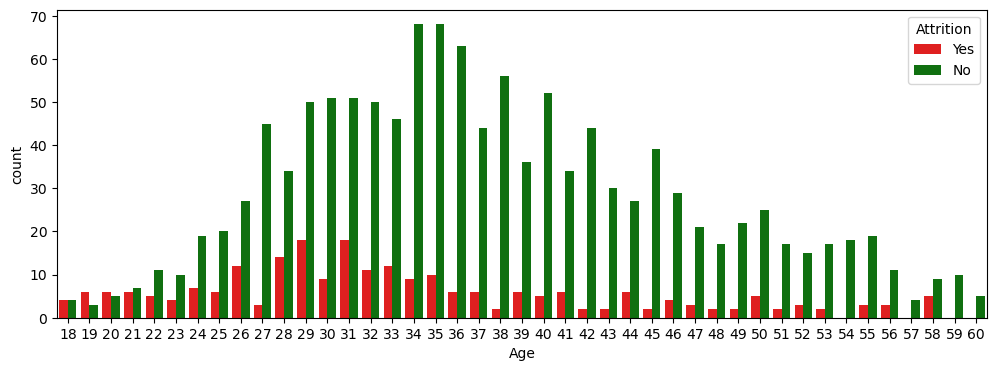

In [17]:
# Attrition Terhadap Age
plt.figure(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=df,hue_order=['Yes','No'],palette=['red','green']);

Kesimpulan:

- Karyawan umur 29 dan 31 memiliki jumlah Attrition yang tinggi

- Karwayan yang berumur 18-20 memiliki jumlah Attrition yang lebih tinggi dibandung jumlah yang bertahan

Berarti bisa di artikan bahwa, ada hubungan yang kecil antara age terhadap attrition, tapi ini hubungan ini hanya terdapat di karwayan yang berumur masih muda (18-20) atau karyawan yang berumur 29 & 31.

### Apakah Attrition dipengaruhi oleh Frekuensi Business Travel (Business Trip) ?

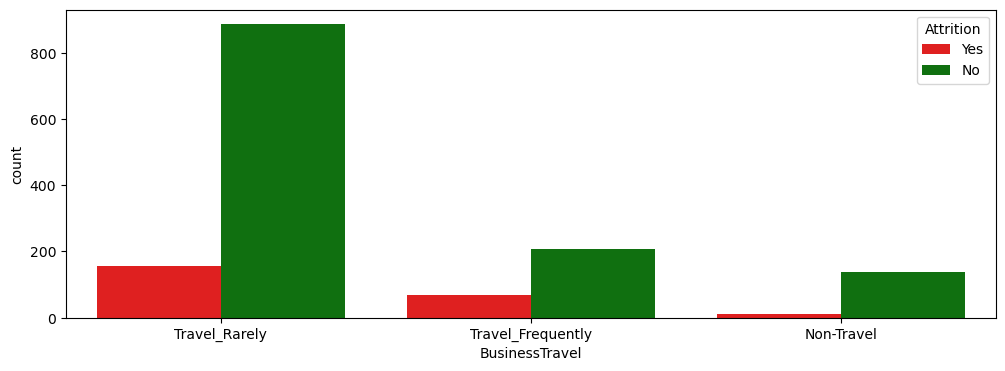

In [18]:
# Attrition Terhadap Business Travel
plt.figure(figsize=(12,4))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df,hue_order=['Yes','No'],palette=['red','green']);

**Kesimpulan:**

- Grafik diatas tersebut menunjukkan bahwa karyawan yang jarang melakukan perjalanan bisnis ("travel rarely") memiliki tingkat attrition tertinggi, diikuti oleh yang sering melakukan perjalanan ("travel_frequently"), dan yang paling rendah adalah karyawan yang tidak melakukan perjalanan bisnis sama sekali ("Non-travel").

Berarti bisa di artikan bahwa, hubungan antara Attrition dengan Business Travel itu sangat kecil

### Apakah Attrition rate dipengaruhi oleh Departemen ?

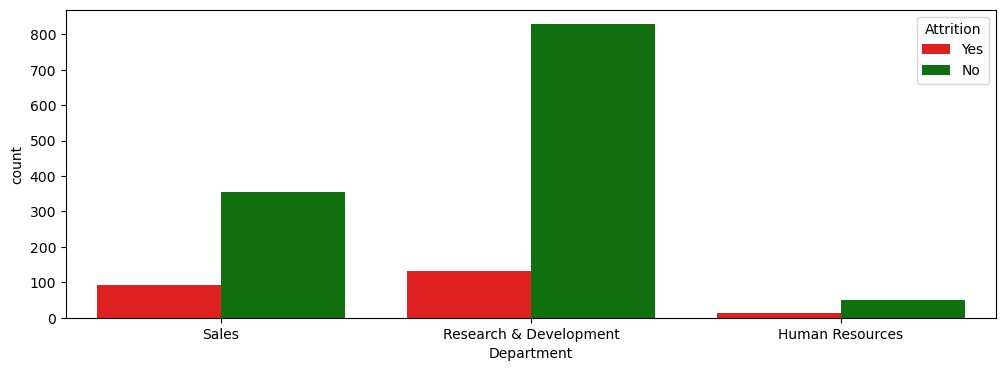

In [19]:
# Attrition Berdasarkan Department
plt.figure(figsize=(12,4))
sns.countplot(x='Department', hue='Attrition', data=df,hue_order=['Yes','No'],palette=['red','green']);

In [20]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

**Kesimpulan:**

- Grafik diatas tersebut menunjukkan bahwa karyawan divisi R&D ("Research & Development") memiliki tingkat attrition tertinggi, diikuti oleh karyawan divisi Sales ("Sales"), dan yang paling rendah adalah karyawan divisi HR ("Human Resources").

Melihat data diatas, kita bisa bilang bahwa tingginya rate attrition pada divisi R&D bisa di jelaskan dengan jumlah karyawan pada divisi itu yang lebih banyak dari divisi lain.

### Apakah Attrition dipengaruhi oleh status pernikahan ?

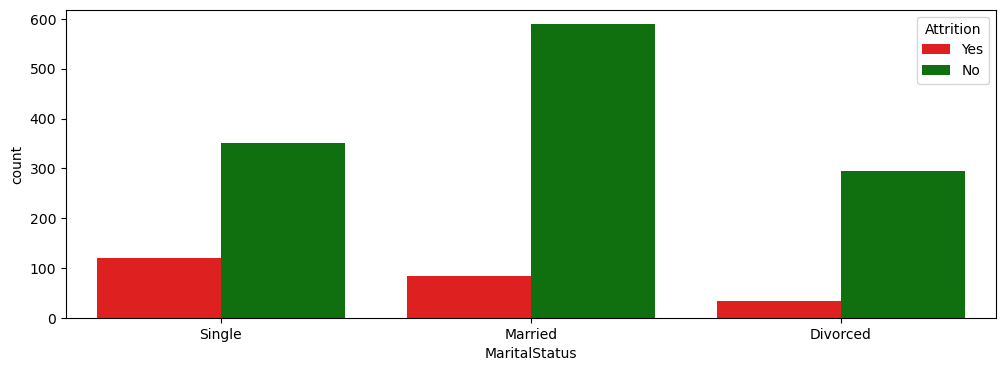

In [21]:
# Attrition Berdasarkan MaritalStatus
plt.figure(figsize=(12,4))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df,hue_order=['Yes','No'],palette=['red','green']);

**Kesimpulan:**

- Grafik diatas tersebut menunjukkan bahwa karyawan berstatus single memiliki tingkat attrition tertinggi, diikuti oleh karyawan berstatus Married, dan yang paling rendah adalah karyawan berstatus cerai ("Divorced").

Melihat data diatas, kita bisa bilang bahwa tingginya rate attrition pada karyawan berstatus disebabkan faktor diluar status marital

### Apakah Attrition dipengaruhi oleh jauh nya jarak dari rumah ?

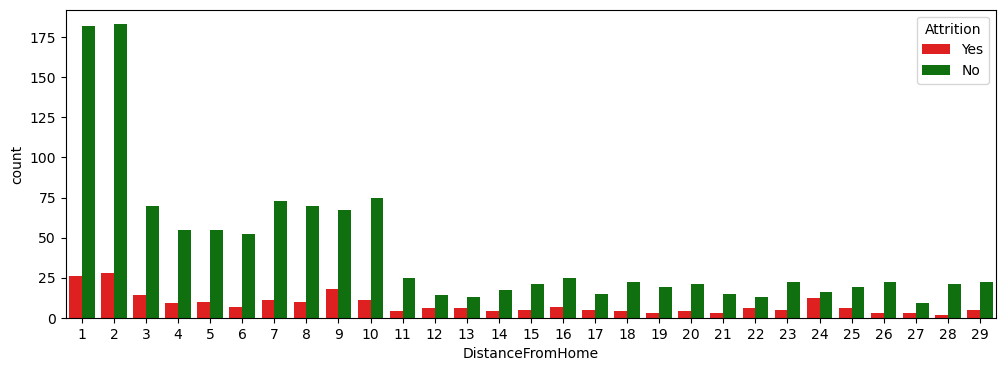

In [22]:
# Attrition Terhadap DistanceFromHome
plt.figure(figsize=(12,4))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df,hue_order=['Yes','No'],palette=['red','green']);

Kesimpulan:

- Karyawan yang jarak rumah dari kantor nya 1-2 mil, memiliki nilai attrition yang tinggi di banding yang lain

Berarti bisa di artikan bahwa, ada hubungan yang kecil antara DistanceFromHome terhadap attrition, tapi ini hubungan ini hanya terdapat di karwayan yang jarak rumah dari kantor nya 1-2 mil.

### Apakah Attrition dipengaruhi oleh lama nya durasi berkerja ?

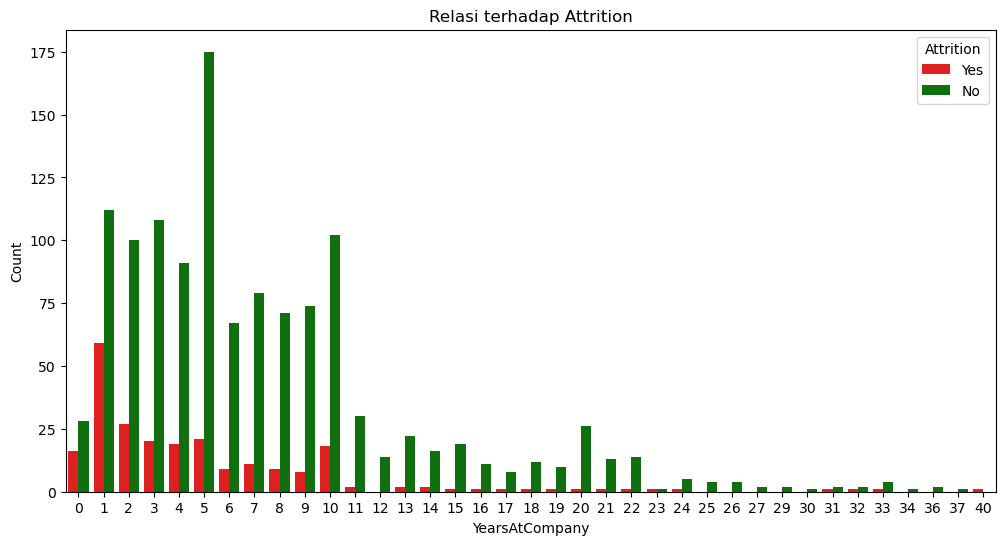

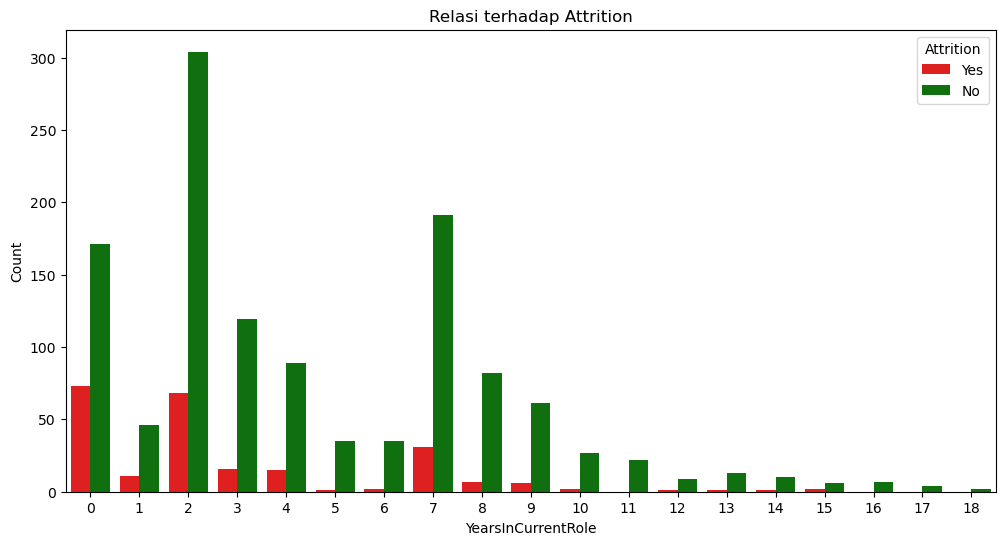

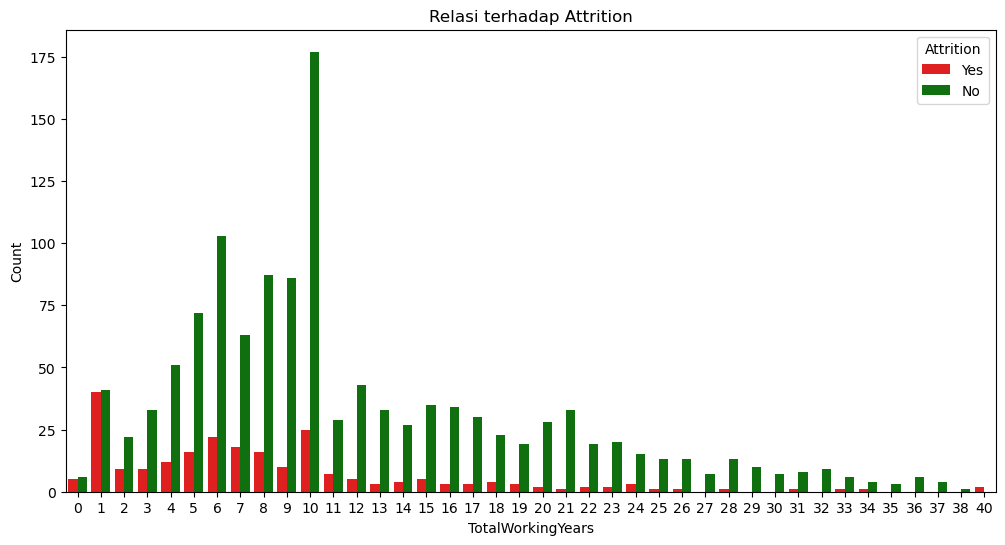

In [23]:
# Attrition Terhadap Tahun Bekerja
tahun = df[['YearsAtCompany','YearsInCurrentRole','TotalWorkingYears']]

# 'YearsWithCurrManager'
for i in tahun:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=i, hue='Attrition',palette=['red','green'])
    plt.title('Relasi terhadap Attrition')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

Kesimpulan:

- Karyawan yang baru berkerja dibawah 5 tahun, memiliki jumlah attrition yang paling tinggi di banding yang lain

Bisa diartikan bahwa, mayoritas yang mengalami Attrition adalah karyawan baru.

### Apakah Attrition dipengaruhi oleh Manager ?

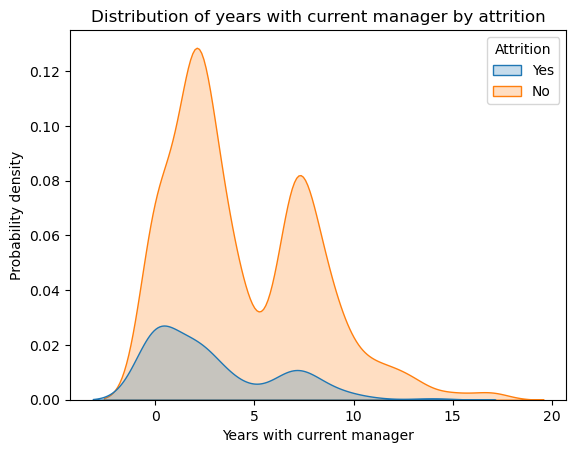

In [24]:
sns.kdeplot(data=df, x="YearsWithCurrManager", hue="Attrition", fill=True)
plt.xlabel("Years with current manager")
plt.ylabel("Probability density")
plt.title("Distribution of years with current manager by attrition")
plt.show()

**Kesimpulan:**

- Semakin lama menghabiskan masa kerja dengan Manajer mengakibatkan pengurangan karyawan, menunjukkan bahwa metodologi manajemen karyawan oleh manajer tersebut memengaruhi keputusan para karyawan untuk meninggalkan perusahaan.

### Apakah Attrition dipengaruhi oleh Overtime(Lembur) ?

In [25]:
# Menunjukan data dimana Overtime = Yes, dan Attrition = Yes
df_ot = df[(df["OverTime"] == "Yes") & (df["Attrition"] == "Yes")]
percentage = len(df_ot) / len(df) * 100
print(f"{percentage:.2f}% of employees left due to overtime.")

8.64% of employees left due to overtime.


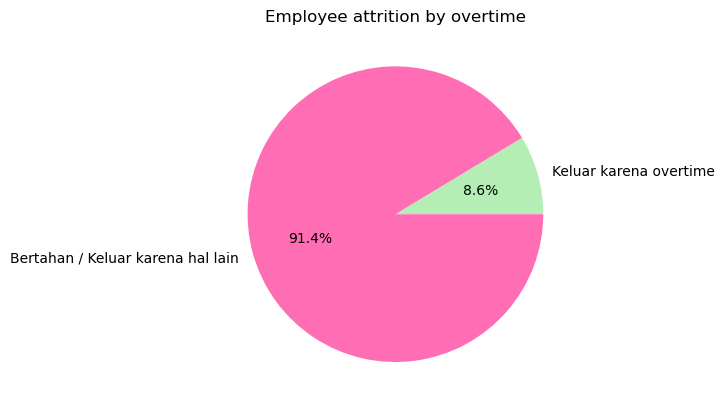

In [26]:
labels = ["Keluar karena overtime", "Bertahan / Keluar karena hal lain"]
colors = ["#B4EEB4", "#FF6EB4"]
plt.pie([percentage, 100 - percentage], labels=labels, colors=colors, autopct="%1.1f%%")

plt.title("Employee attrition by overtime")
plt.show()

**Kesimpulan:**

- Overtime tidak mempengaruhi Attrition

### Recap EDA

- Karyawan yang bertahan cenderung memiliki pengalaman kerja yang lebih lama di perusahaan, seperti TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, dan YearsWithCurrManager yang tinggi.

- Hanya sekitar 16.1% dari seluruh karyawan memilih untuk meninggalkan perusahaan, menunjukkan tingkat attrition yang relatif rendah.

- Mayoritas karyawan perusahaan adalah pria (sekitar 60%).

- Karyawan pria lebih cenderung bertahan di perusahaan dibandingkan dengan karyawan wanita.

- Karyawan dengan tingkat pendidikan Bachelor (level 3) memiliki tingkat attrition yang lebih tinggi dibandingkan dengan tingkat pendidikan lainnya.

- Terdapat tren attrition yang lebih tinggi pada karyawan berumur 29 dan 31 tahun.

- Karyawan berusia 18-20 tahun memiliki tingkat attrition yang lebih tinggi dibandingkan dengan yang bertahan.

- Tingkat attrition tertinggi terjadi pada karyawan yang jarang melakukan perjalanan bisnis ("travel rarely"), diikuti oleh yang sering melakukan perjalanan bisnis ("travel frequently"), dan yang paling rendah pada yang tidak melakukan perjalanan bisnis sama sekali ("Non-travel").

- Tingkat attrition tertinggi terjadi pada karyawan di divisi R&D ("Research & Development"), diikuti oleh karyawan di divisi Sales ("Sales"), dan yang paling rendah pada karyawan di divisi HR ("Human Resources").

- Tingkat attrition tertinggi terjadi pada karyawan yang berstatus single, diikuti oleh yang berstatus married, dan yang paling rendah pada yang berstatus cerai ("Divorced").

- Manajer dengan masa kerja yang lebih lama cenderung mengalami pengurangan karyawan, yang mengindikasikan bahwa metode manajemen karyawan oleh manajer tersebut dapat memengaruhi keputusan karyawan untuk meninggalkan perusahaan.

- Karyawan yang memiliki jarak rumah 1-2 mil dari kantor memiliki tingkat attrition yang tinggi.

- Karyawan yang memiliki pengalaman kerja kurang dari 5 tahun di perusahaan memiliki tingkat attrition yang lebih tinggi, menunjukkan bahwa mayoritas yang mengalami attrition adalah karyawan baru.

- Tidak terdapat pengaruh yang signifikan dari lembur (overtime) terhadap tingkat attrition.

## Feature Selection

**Pada tahap ini, kita akan menentukan fitur, dan target, menggunakan phik matrix**

In [27]:
# Uji Korelasi Menggunakan Phik
phik_matrix = df.phik_matrix()


interval columns not set, guessing: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


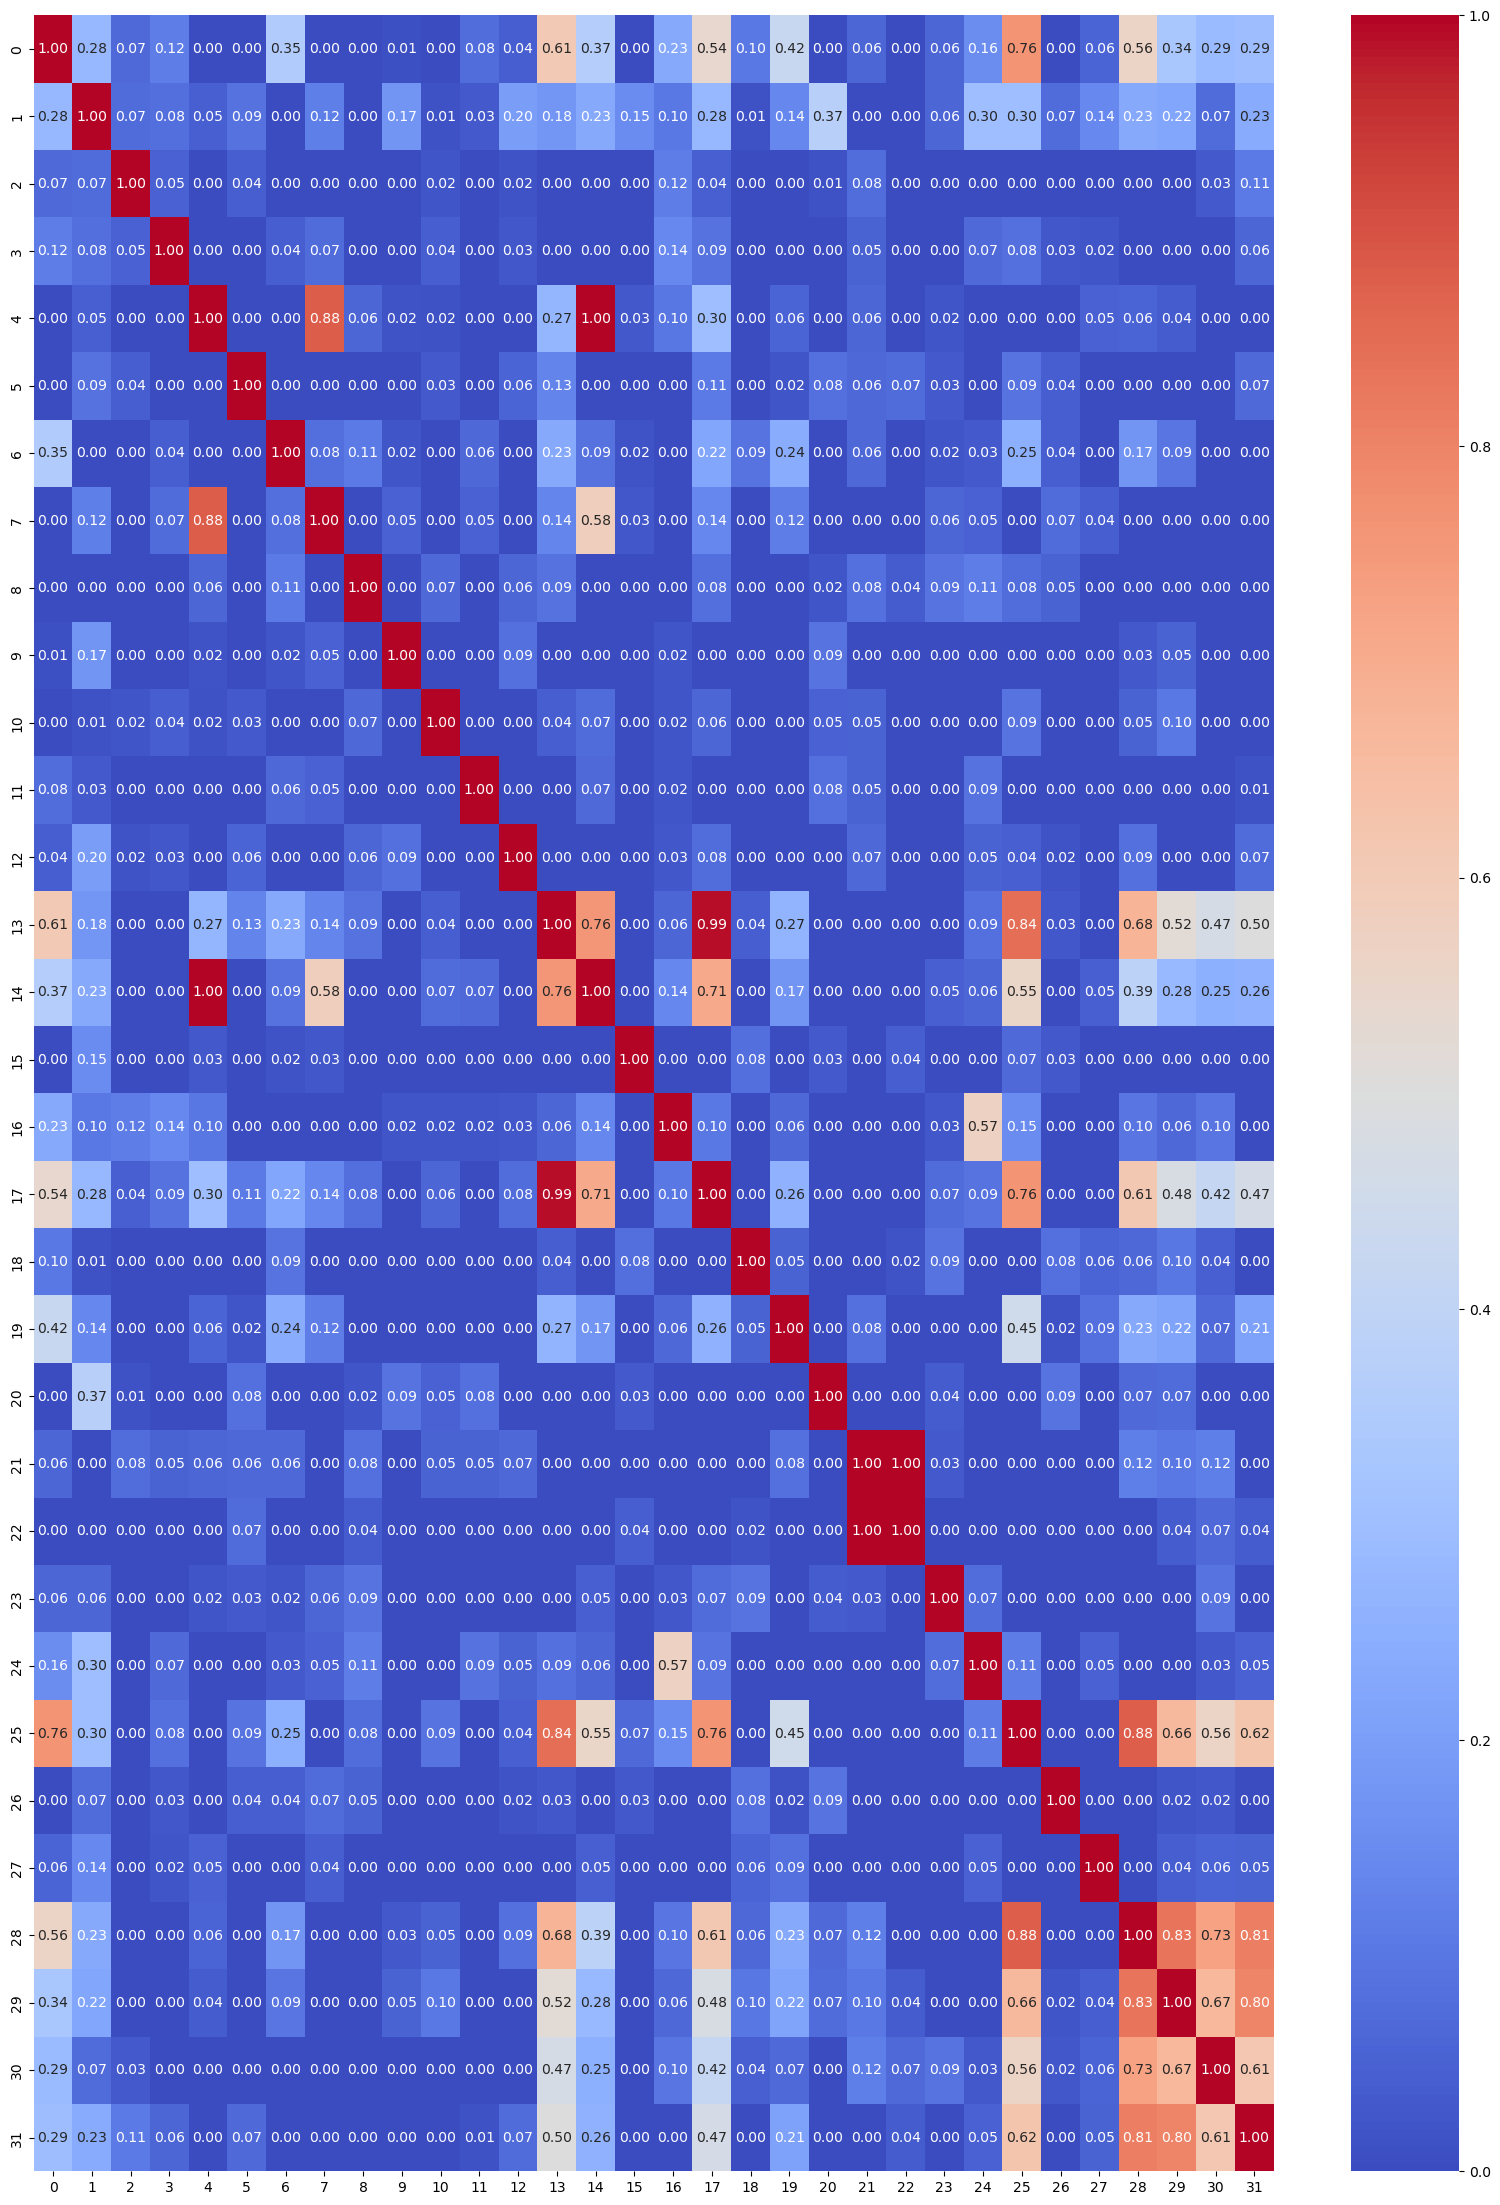

In [28]:
#Membuat plot heatmap phik
plt.figure(figsize=(20, 28))
sns.heatmap(phik_matrix.values, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [29]:
# Define Kolom target
target_column = 'Attrition'

# Menampilkan kolom-kolom yang memiliki korelasi tertinggi dengan kolom target
correlations_with_target = phik_matrix.loc[target_column].drop(target_column)

# Urutkan berdasarkan nilai korelasi
sorted_correlations = correlations_with_target.sort_values(ascending=False)

print("Kolom yang memiliki Korelasi Tertinggi dengan", target_column)
print(sorted_correlations)

Kolom yang memiliki Korelasi Tertinggi dengan Attrition
OverTime                    0.372139
TotalWorkingYears           0.297661
StockOptionLevel            0.297477
MonthlyIncome               0.280586
Age                         0.278172
YearsWithCurrManager        0.234576
YearsAtCompany              0.232555
JobRole                     0.231491
YearsInCurrentRole          0.220379
JobInvolvement              0.198658
JobLevel                    0.176826
EnvironmentSatisfaction     0.173876
JobSatisfaction             0.150024
WorkLifeBalance             0.143809
NumCompaniesWorked          0.139653
EducationField              0.120607
MaritalStatus               0.104779
DistanceFromHome            0.089419
DailyRate                   0.081192
BusinessTravel              0.074137
TrainingTimesLastYear       0.073856
YearsSinceLastPromotion     0.071614
RelationshipSatisfaction    0.059039
Department                  0.046641
HourlyRate                  0.032302
Gender             

Kolom yang memiliki Korelasi Tertinggi dengan Attrition
- OverTime                    0.372139
- TotalWorkingYears           0.297661
- StockOptionLevel            0.297477
- MonthlyIncome               0.280586
- Age                         0.278172
- YearsWithCurrManager        0.234576
- YearsAtCompany              0.232555
- JobRole                     0.231491
- YearsInCurrentRole          0.220379
- JobInvolvement              0.198658

In [30]:
# Ubah output Attrition dari Yes/No jadi 1/0

df['Attrition'] = df['Attrition'].replace({'Yes':1, 'No':0})
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [31]:
# Buat dataframe baru dimana isi nya dalah target, dan kolom yang memiliki korelasi tinggi terhadap target
df2= df[['OverTime','TotalWorkingYears','StockOptionLevel','MonthlyIncome',
        'Age','YearsWithCurrManager','YearsAtCompany','JobRole',
        'YearsInCurrentRole', 'JobInvolvement','Attrition']]

df2

,OverTime,TotalWorkingYears,StockOptionLevel,MonthlyIncome,Age,YearsWithCurrManager,YearsAtCompany,JobRole,YearsInCurrentRole,JobInvolvement,Attrition
0,Yes,8,0,5993,41,5,6,Sales Executive,4,3,1
1,No,10,1,5130,49,7,10,Research Scientist,7,2,0
2,Yes,7,0,2090,37,0,0,Laboratory Technician,0,2,1
3,Yes,8,0,2909,33,0,8,Research Scientist,7,3,0
4,No,6,1,3468,27,2,2,Laboratory Technician,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
1465,No,17,1,2571,36,3,5,Laboratory Technician,2,4,0
1466,No,9,1,9991,39,7,7,Healthcare Representative,7,2,0
1467,Yes,6,1,6142,27,3,6,Manufacturing Director,2,4,0
1468,No,17,0,5390,49,8,9,Sales Executive,6,2,0


# v. Feature Engineering

**Pada tahap Preprocessing, kita akan lakukan:**
- Split
- Encoding (Menggunakan Pipeline)
- Scaling (Menggunakan Pipeline)

## Splitting

In [32]:
# split data antara X (fitur) dan y (target)
X = df2.drop('Attrition', axis=1) # X = Fitur
y = df2['Attrition'] # y = Target

In [33]:
# ubah menjadi 2 jenis variabel,X,y train dan test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5,stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('\nTrain Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (1176, 10)
Test Size  :  (294, 10)

Train Size :  (1176,)
Test Size  :  (294,)


## Pipeline

**Splitting:**

Pada tahap ini kita akan melakukan scaling, scaling digunakan untuk mengubah rentang nilai dari berbagai fitur sehingga memiliki skala yang serupa

**Encoding:**

Sebelumnya kita harus tau, data kategorikan nya itu ordinal atau nominal
- nomimal = tidak punya lvl,gunakan OneHotEncoder
- ordinal = memiliki lvl,gunakan OrdinalEncoding

In [34]:
# Tentukan kolom numerik dan kolom kategorikal yang akan diencode dan scaling menggunakan Pipeline
numeric_cols = ['TotalWorkingYears', 'MonthlyIncome', 'Age', 'YearsWithCurrManager', 'YearsAtCompany', 'YearsInCurrentRole']
categorical_ordinal = ['StockOptionLevel', 'JobInvolvement']
categorical_nonordinal = ['OverTime', 'JobRole']

In [35]:
# pipeline untuk scaling data numerikal
num_pipeline = Pipeline([
    ('scaler',RobustScaler())
    
])

# pipeline untuk encode data non ordinal
cat_pipeline = Pipeline([

            ('passthrough', None) ])

cat_pipeline2 = Pipeline([


    ('Encoder',OneHotEncoder(sparse=False))
])

prep = ColumnTransformer([
    ('categorical_ordinal',cat_pipeline,categorical_ordinal),
    ('categorical_nonordinal',cat_pipeline2,categorical_nonordinal),
    ('numeric_cols',num_pipeline,numeric_cols)
])

final = imbpipe([
    ('preprocess',prep),
])

final


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_ordinal',
                                                  Pipeline(steps=[('passthrough',
                                                                   None)]),
                                                  ['StockOptionLevel',
                                                   'JobInvolvement']),
                                                 ('categorical_nonordinal',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['OverTime', 'JobRole']),
                                                 ('numeric_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['TotalWorkingYears',
                                                   'MonthlyIncome', 'Age',
                                                   'YearsWithCurrManager',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole'])]))])

In [36]:
# mem-fit (melatih) model dengan data train (X_train)
X_train_new = final.fit_transform(X_train)
X_train_new = pd.DataFrame(X_train_new)
X_train_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.7,-0.404941,-0.666667,-0.2,-0.285714,-0.4
1,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.6,2.696271,1.583333,2.0,4.428571,0.6
2,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.7,-0.337160,0.416667,-0.6,-0.571429,-0.6
3,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,-0.070628,0.500000,0.2,0.142857,0.4
4,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.459497,0.166667,1.2,0.714286,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.2,-0.092671,-0.333333,0.0,0.000000,-0.2
1172,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.5,-0.451231,-0.583333,-0.6,-0.571429,-0.6
1173,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.9,2.381980,1.833333,-0.6,-0.571429,-0.6
1174,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,-0.107366,-0.083333,0.2,0.000000,0.2


In [37]:
# melakukan transformasi pada data test (X_test)
X_test_new = final.transform(X_test)
X_test_new = pd.DataFrame(X_test_new)
X_test_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.2,2.668718,0.333333,1.2,2.285714,0.8
1,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.4,0.299504,-0.166667,-0.2,-0.285714,-0.2
2,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6,0.189658,1.500000,0.4,0.142857,-0.2
3,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.3,0.195904,0.083333,0.8,0.285714,0.8
4,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.649982,1.333333,0.8,0.428571,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2,1.280400,-0.250000,1.0,0.714286,0.6
290,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.2,0.206558,0.416667,-0.2,0.000000,0.2
291,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.1,0.018093,0.750000,0.0,0.000000,0.2
292,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.090283,0.750000,0.0,-0.142857,-0.2


## Balancing

**Pada tahap ini kita akan melakukan balancing data menggunakan smotenc**

In [38]:
# Menambahkan data yang inbalance dengan metode oversampling
smnc = SMOTENC(sampling_strategy='auto',random_state=66,categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12])

X_train_balanced, y_train_balanced = smnc.fit_resample(X_train_new, y_train)

y_train_balanced.value_counts()

0    986
1    986
Name: Attrition, dtype: int64

In [39]:
# menampilkan data dari X_train_balanced
X_train_balanced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.700000,-0.404941,-0.666667,-0.200000,-0.285714,-0.400000
1,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.600000,2.696271,1.583333,2.000000,4.428571,0.600000
2,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.700000,-0.337160,0.416667,-0.600000,-0.571429,-0.600000
3,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.300000,-0.070628,0.500000,0.200000,0.142857,0.400000
4,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.459497,0.166667,1.200000,0.714286,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.828297,-0.323073,-0.666667,-0.313190,-0.468996,-0.256595
1968,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.900000,-0.544377,-0.639395,-0.477575,-0.571429,-0.600000
1969,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.778054,-0.424473,-0.430383,-0.189027,-0.412896,-0.210973
1970,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.727704,2.413677,0.848819,1.508783,2.922783,1.400000


# vi. Modeling (Definition,Training,Evaluation)

Saya memakai kelas positif(1) sebagai kelas Attrition (Keluar) dan kelas negatif(0) adalah kelas Tidak Keluar. Dan saya memilih Recall untuk nilai evaluasi karena ingin mengurangi False Negative(FN). Pada kasus ini, False Negative berarti diprediksi tidak keluar, namun aktualnya keluar

## BaseModel

**Model yang kita gunakan adalah:**
- KKN 
- SVM
- DecissionTree
- RandomForest
- AdaBoost


In [40]:
# Define model yang akan digunakan
knn = KNeighborsClassifier()
svm = SVC(random_state=69)
dt = DecisionTreeClassifier(random_state=69)
rf = RandomForestClassifier(random_state=69)
aboost = AdaBoostClassifier(random_state=69)

## KNN


**dibawah ini adalah model training menggunakan Knn**

In [41]:
# Fitting model ke data train
knn.fit(X_train_balanced,y_train_balanced)

KNeighborsClassifier()

In [42]:
# Predicting the target labels for the train and test data using the KNN Base model
knn_train = knn.predict(X_train_balanced)
knn_test = knn.predict(X_test_new)

# Displaying the classification report for KNN default model on the train and test data
print(classification_report(y_train_balanced, knn_train))
print(classification_report(y_test, knn_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       986
           1       0.87      0.95      0.91       986

    accuracy                           0.90      1972
   macro avg       0.91      0.90      0.90      1972
weighted avg       0.91      0.90      0.90      1972

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.33      0.57      0.42        47

    accuracy                           0.74       294
   macro avg       0.62      0.68      0.63       294
weighted avg       0.81      0.74      0.77       294



Skor KNN X_train adalah : 91% untuk f1-score, 95% untuk recall, 87% untuk precision dan 90% untuk accuracy

Skor KNN X_test adalah : 42% untuk f1-score, 57% untuk recall, 42% untuk precision dan 74% untuk accuracy

Model ini overfitting karena nilai X_train lebih besar daripada X_test

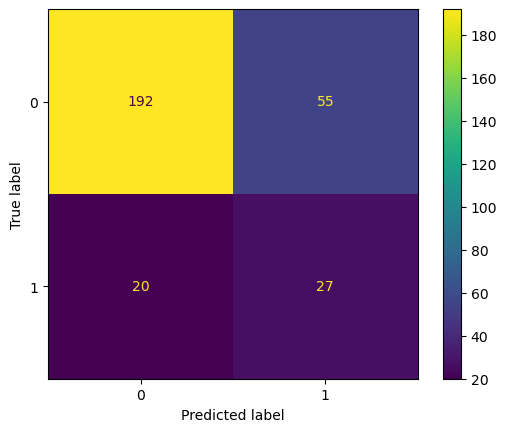

In [43]:
# Confusion matrix for the test data
ConfusionMatrixDisplay.from_estimator(knn,X_test_new,y_test)

Menurut hasil dari confusion matrix, kita mendapat:
- Score FN = 20 
- Score FP = 55
- Score TN = 27 
- Score TP = 192

## SVC

In [44]:
# Fitting model ke data train
svm.fit(X_train_balanced,y_train_balanced)

SVC(random_state=69)

In [45]:
# Predicting the target labels for the train and test data using the SVC Base model
svc_train = svm.predict(X_train_balanced)
svc_test = svm.predict(X_test_new)

print(classification_report(y_train_balanced, svc_train))
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       986
           1       0.85      0.88      0.86       986

    accuracy                           0.86      1972
   macro avg       0.86      0.86      0.86      1972
weighted avg       0.86      0.86      0.86      1972

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.35      0.62      0.45        47

    accuracy                           0.76       294
   macro avg       0.63      0.70      0.65       294
weighted avg       0.83      0.76      0.78       294



Skor SVC X_train adalah : 86% untuk f1-score, 88% untuk recall, 85% untuk precision dan 85% untuk accuracy

Skor SVC X_test adalah : 45% untuk f1-score, 62% untuk recall, 35% untuk precision dan 76% untuk accuracy

Model ini overfitting karena nilai X_train lebih besar daripada X_test

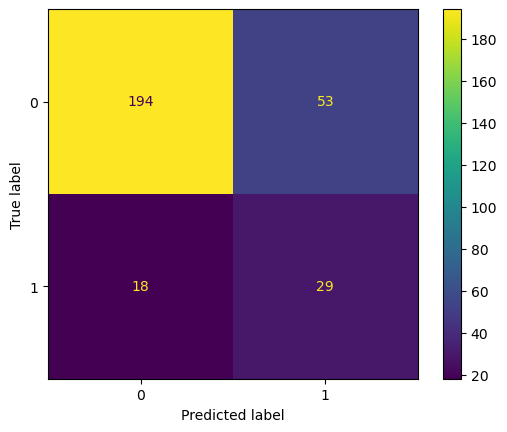

In [46]:
# Confusion matrix for the test data
ConfusionMatrixDisplay.from_estimator(svm,X_test_new,y_test)

Menurut hasil dari confusion matrix, kita mendapat:
- Score FN = 18
- Score FP = 53
- Score TN = 29
- Score TP = 194

## DecisionTree

In [47]:
# Fitting model ke data train
dt.fit(X_train_balanced,y_train_balanced)

DecisionTreeClassifier(random_state=69)

In [48]:
# Predicting the target labels for the train and test data using the DecisionTree Base model
dt_train = dt.predict(X_train_balanced)
dt_test = dt.predict(X_test_new)

print(classification_report(y_train_balanced, dt_train))
print(classification_report(y_test, dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       247
           1       0.28      0.40      0.33        47

    accuracy                           0.74       294
   macro avg       0.58      0.60      0.58       294
weighted avg       0.78      0.74      0.76       294



Skor DecisionTree X_train adalah : 100% untuk f1-score, 100% untuk recall, 100% untuk precision dan 100% untuk accuracy

Skor DecisionTree X_test adalah : 33% untuk f1-score, 40% untuk recall, 28% untuk precision dan 74% untuk accuracy

Model ini overfitting karena nilai X_train lebih besar daripada X_test

Nilai dari X_train bisa mengindikasikan adanya kesalahan dalam proses preprocessing sebelumnya

Secara personal, saya sudah mencoba untuk mengubah metode encode nya, dan feature selection sudah saya ubah, namum hasil ini pun tetap sama

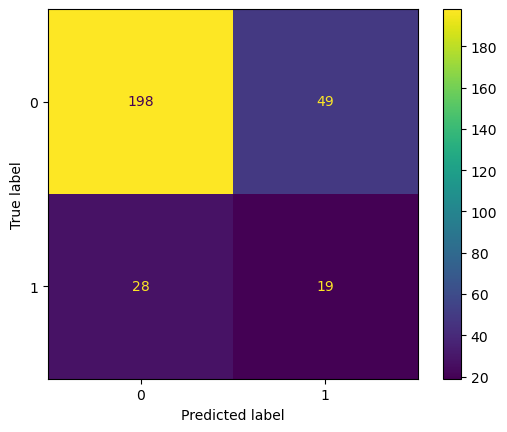

In [49]:
# Confusion matrix for the test data
ConfusionMatrixDisplay.from_estimator(dt,X_test_new,y_test)

Menurut hasil dari confusion matrix, kita mendapat:
- Score FN = 28
- Score FP = 49
- Score TN = 19
- Score TP = 198

## RandomForest

In [50]:
# Fitting model ke data train
rf.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier(random_state=69)

In [51]:
# Predicting the target labels for the train and test data using the RandomForest Base model
rf_train = rf.predict(X_train_balanced)
rf_test = rf.predict(X_test_new)

print(classification_report(y_train_balanced, rf_train))
print(classification_report(y_test, rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.41      0.40      0.41        47

    accuracy                           0.81       294
   macro avg       0.65      0.65      0.65       294
weighted avg       0.81      0.81      0.81       294



Skor RandomForest X_train adalah : 100% untuk f1-score, 100% untuk recall, 100% untuk precision dan 100% untuk accuracy

Skor RandomForest X_test adalah : 41% untuk f1-score, 40% untuk recall, 41% untuk precision dan 81% untuk accuracy

Model ini overfitting karena nilai X_train lebih besar daripada X_test

Nilai dari X_train bisa mengindikasikan adanya kesalahan dalam proses preprocessing sebelumnya

Secara personal, saya sudah mencoba untuk mengubah metode encode nya, dan feature selection sudah saya ubah, namum hasil ini pun tetap sama

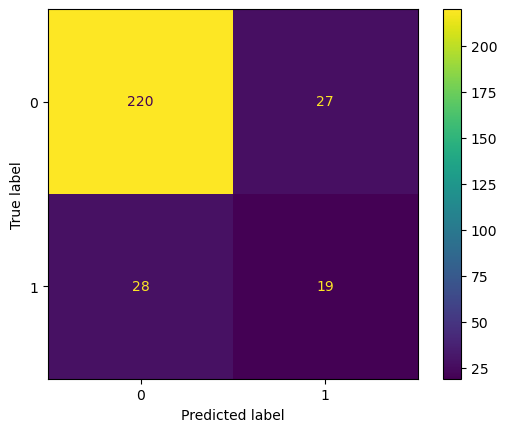

In [52]:
# Confusion matrix for the test data
ConfusionMatrixDisplay.from_estimator(rf,X_test_new,y_test)

Menurut hasil dari confusion matrix, kita mendapat:
- Score FN = 28
- Score FP = 27
- Score TN = 19
- Score TP = 220

## AdaBoost

In [53]:
# Fitting model ke data train
aboost.fit(X_train_balanced,y_train_balanced)

AdaBoostClassifier(random_state=69)

In [54]:
# Predicting the target labels for the train and test data using the AdaBoost Base model
aboost_train = aboost.predict(X_train_balanced)
aboost_test = aboost.predict(X_test_new)

print(classification_report(y_train_balanced, aboost_train))
print(classification_report(y_test, aboost_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       986
           1       0.83      0.87      0.85       986

    accuracy                           0.84      1972
   macro avg       0.84      0.84      0.84      1972
weighted avg       0.84      0.84      0.84      1972

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.37      0.66      0.47        47

    accuracy                           0.77       294
   macro avg       0.65      0.72      0.66       294
weighted avg       0.84      0.77      0.79       294



Skor RandomForest X_train adalah : 85% untuk f1-score, 87% untuk recall, 83% untuk precision dan 84% untuk accuracy

Skor RandomForest X_test adalah : 47% untuk f1-score, 66% untuk recall, 37% untuk precision dan 77% untuk accuracy

Model ini overfitting karena nilai X_train lebih besar daripada X_test

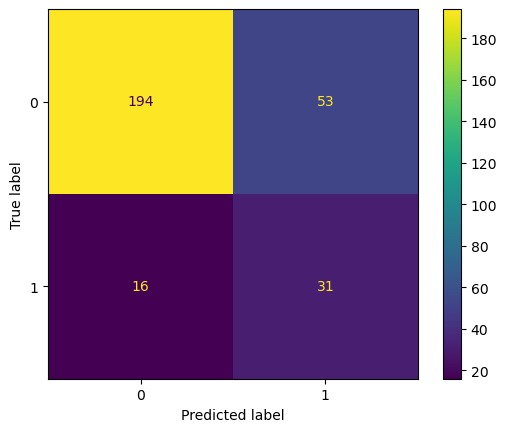

In [55]:
# Confusion matrix for the test data
ConfusionMatrixDisplay.from_estimator(aboost,X_test_new,y_test)

Menurut hasil dari confusion matrix, kita mendapat:
- Score FN = 16
- Score FP = 53
- Score TN = 31
- Score TP = 194

## CrossValidation

In [56]:
def cross_val (model):

    recall_score_train_cross_val = cross_val_score(model,
                                        X_train_balanced,
                                        y_train_balanced,
                                        cv=5,
                                        scoring="recall")

    print('----Cross Validation',model,'---- ')
    print('recall_score Score - All - Cross Validation  : ', recall_score_train_cross_val)
    print('recall_score Score - Mean - Cross Validation : ', recall_score_train_cross_val.mean())
    print('recall_score Score - Std - Cross Validation  : ', recall_score_train_cross_val.std())
    print('recall_score Score - Range of Test-Set       : ', (recall_score_train_cross_val.mean()-recall_score_train_cross_val.std()) , '-', (recall_score_train_cross_val.mean()+recall_score_train_cross_val.std()))

In [57]:
cross_val(knn)

----Cross Validation KNeighborsClassifier() ---- 
recall_score Score - All - Cross Validation  :  [0.76142132 0.95454545 0.97461929 1.         0.96446701]
recall_score Score - Mean - Cross Validation :  0.9310106137517306
recall_score Score - Std - Cross Validation  :  0.08613361652363416
recall_score Score - Range of Test-Set       :  0.8448769972280964 - 1.0171442302753646


In [58]:
cross_val(svm)

----Cross Validation SVC(random_state=69) ---- 
recall_score Score - All - Cross Validation  :  [0.62436548 0.91919192 0.91878173 0.88324873 0.90862944]
recall_score Score - Mean - Cross Validation :  0.8508434599805156
recall_score Score - Std - Cross Validation  :  0.1139901009014347
recall_score Score - Range of Test-Set       :  0.7368533590790809 - 0.9648335608819503


In [59]:
cross_val(rf)

----Cross Validation RandomForestClassifier(random_state=69) ---- 
recall_score Score - All - Cross Validation  :  [0.55837563 0.93939394 0.96954315 0.96954315 0.95939086]
recall_score Score - Mean - Cross Validation :  0.8792493462544225
recall_score Score - Std - Cross Validation  :  0.1608141254033619
recall_score Score - Range of Test-Set       :  0.7184352208510606 - 1.0400634716577843


In [60]:
cross_val(dt)

----Cross Validation DecisionTreeClassifier(random_state=69) ---- 
recall_score Score - All - Cross Validation  :  [0.52791878 0.87373737 0.92893401 0.91370558 0.93908629]
recall_score Score - Mean - Cross Validation :  0.8366764087576269
recall_score Score - Std - Cross Validation  :  0.15597277382427344
recall_score Score - Range of Test-Set       :  0.6807036349333535 - 0.9926491825819004


In [61]:
cross_val(aboost)

----Cross Validation AdaBoostClassifier(random_state=69) ---- 
recall_score Score - All - Cross Validation  :  [0.53299492 0.8989899  0.89340102 0.87817259 0.91878173]
recall_score Score - Mean - Cross Validation :  0.8244680305594011
recall_score Score - Std - Cross Validation  :  0.14631547415492333
recall_score Score - Range of Test-Set       :  0.6781525564044778 - 0.9707835047143244


**Model dengan nilai mean tertinggi adalah KNN dengan nilai mean 0.93 dan standar deviasi 0.086, maka pada hyperparameter tuning, kita akan menggunakan KNN**

## HyperParameterTuning

**Hyperparameter tuning adalah proses mencari dan memilih kombinasi terbaik dari hyperparameter untuk model machine learning guna meningkatkan kinerja model pada data uji**

In [62]:
# Tentukan rentang nilai hyperparameter yang akan diuji
param_dist = {
    'n_neighbors': range(1, 21),  # Coba nilai K dari 1 hingga 20
    'weights': ['uniform', 'distance'],  # Metode bobot: uniform atau distance
    'p': [1, 2]  # Jarak Minkowski: 1 (Manhattan) atau 2 (Euclidean)
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    knn, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5, n_jobs=-1, random_state=42
)

# Lakukan pencarian hyperparameter terbaik menggunakan data train dan label train
random_search.fit(X_train_balanced, y_train_balanced)

# Tampilkan hyperparameter terbaik dan skor validasi terbaik
print("Hyperparameter terbaik:", random_search.best_params_)
print("Skor validasi terbaik:", random_search.best_score_)

Hyperparameter terbaik: {'weights': 'uniform', 'p': 1, 'n_neighbors': 2}
Skor validasi terbaik: 0.8894853177407954


Hyperparameter terbaik untuk Model adalah: {'weights': 'uniform', 'p': 1, 'n_neighbors': 2}

Skor validasi terbaik untuk Model adalah: 0.889

In [63]:
# Use the best KNN Classifier model to make predictions
knn_best = random_search.best_estimator_

In [64]:
knn_best.fit(X_train_balanced,y_train_balanced)

KNeighborsClassifier(n_neighbors=2, p=1)

In [65]:
knn_best_train = knn_best.predict(X_train_balanced)
knn_best_test = knn_best.predict(X_test_new)

print(classification_report(y_train_balanced, knn_best_train))
print(classification_report(y_test, knn_best_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       986
           1       1.00      0.94      0.97       986

    accuracy                           0.97      1972
   macro avg       0.97      0.97      0.97      1972
weighted avg       0.97      0.97      0.97      1972

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       247
           1       0.31      0.32      0.31        47

    accuracy                           0.78       294
   macro avg       0.59      0.59      0.59       294
weighted avg       0.78      0.78      0.78       294



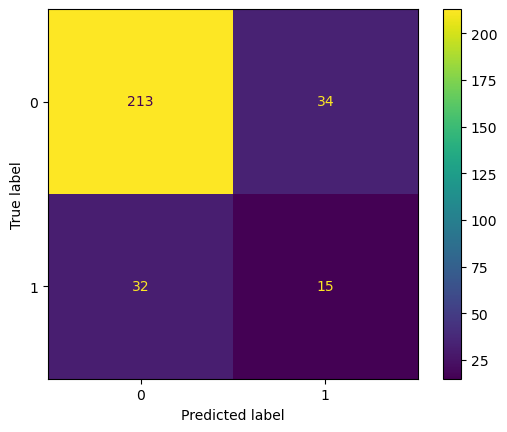

In [68]:
ConfusionMatrixDisplay.from_estimator(knn_best,X_test_new,y_test)

## Kesimpulan Model

In [66]:
#membuat table baru default untuk nantinya membandingkan dengan nilai f1 score test yang default dan yang sudah dengan menggunakan random seach
all_reports_knn = {}
def performance_report(all_reports_knn, y_train_balanced, knn_train, y_test, knn_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train_balanced, knn_train),
      'train - recall' : recall_score(y_train_balanced, knn_train),
      'train - accuracy' : accuracy_score(y_train_balanced, knn_train),
      'train - f1_score' : f1_score(y_train_balanced, knn_train),
      'test - precision' : precision_score(y_test, knn_test),
      'test - recall' : recall_score(y_test, knn_test),
      'test - accuracy_score' : accuracy_score(y_test, knn_test),
      'test - f1_score' : f1_score(y_test, knn_test),
  }
  all_reports_knn[name] = score_reports
  return all_reports_knn

all_reports_knn = performance_report(all_reports_knn, y_train_balanced, knn_train, y_test, knn_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports_knn)

all_reports_knn = performance_report(all_reports_knn, y_train_balanced, knn_best_train, y_test, knn_best_test, 'After HyperParameter Tuning')
pd.DataFrame(all_reports_knn)

,Baseline (Default Hyperparameter),After HyperParameter Tuning
train - precision,0.867036,1.000000
train - recall,0.952333,0.939148
train - accuracy,0.903144,0.969574
train - f1_score,0.907685,0.968619
test - precision,0.329268,0.306122
test - recall,0.574468,0.319149
test - accuracy_score,0.744898,0.775510
test - f1_score,0.418605,0.312500


Karena hasil recall Train (0.93) dari model ini lebih besar dari hasil recall test (0.31), maka model ini bisa dibilang **`OverFit`**

## Model Evaluation

Karena hasil nya yang kurang bagus, dan malah Overfit, saya ingin menyarankan untuk kedepan nya:

- Tuning Hyperparameter: Coba tuning metode hyperparametertuning yang lain, seperti Grid Search Search untuk mencari kombinasi hyperparameter yang lebih baik.

- Feature Selection: Pertimbangkan untuk melakukan seleksi fitur (feature selection) untuk mengurangi dimensi data jika terdapat banyak fitur. Ini dapat membantu mengurangi kompleksitas model.

- Mengukur Metrik Lain: Selain recall, periksa metrik lain seperti akurasi, presisi, dan F1-score. Ini akan memberikan gambaran yang lebih lengkap tentang kinerja model.

- Karena ingin fokus kepada False Positive, dimana terprediksi bahwa karyawan tidak keluar, tapi aktual nya karyawan keluar, maka kedepan nya saya akan menilai menggunakan recall.



# vii. Model Saving

In [67]:
with open('pipeline.pkl', 'wb') as file_1:
  pickle.dump(final, file_1)

with open('knn_best.pkl', 'wb') as file_2:
  pickle.dump(knn_best, file_2)


# ix. Pengambilan Kesimpulan

**Kesimpulan yang sama terdapat pada file inf model**

## Kesimpulan Data


- Karyawan yang bertahan cenderung memiliki pengalaman kerja yang lebih lama di perusahaan, seperti TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, dan YearsWithCurrManager yang tinggi.

- Hanya sekitar 16.1% dari seluruh karyawan memilih untuk meninggalkan perusahaan, menunjukkan tingkat attrition yang relatif rendah.

- Mayoritas karyawan perusahaan adalah pria (sekitar 60%).

- Karyawan pria lebih cenderung bertahan di perusahaan dibandingkan dengan karyawan wanita.

- Karyawan dengan tingkat pendidikan Bachelor (level 3) memiliki tingkat attrition yang lebih tinggi dibandingkan dengan tingkat pendidikan lainnya.

- Terdapat tren attrition yang lebih tinggi pada karyawan berumur 29 dan 31 tahun.

- Karyawan berusia 18-20 tahun memiliki tingkat attrition yang lebih tinggi dibandingkan dengan yang bertahan.

- Tingkat attrition tertinggi terjadi pada karyawan yang jarang melakukan perjalanan bisnis ("travel rarely"), diikuti oleh yang sering melakukan perjalanan bisnis ("travel frequently"), dan yang paling rendah pada yang tidak melakukan perjalanan bisnis sama sekali ("Non-travel").

- Tingkat attrition tertinggi terjadi pada karyawan di divisi R&D ("Research & Development"), diikuti oleh karyawan di divisi Sales ("Sales"), dan yang paling rendah pada karyawan di divisi HR ("Human Resources").

- Tingkat attrition tertinggi terjadi pada karyawan yang berstatus single, diikuti oleh yang berstatus married, dan yang paling rendah pada yang berstatus cerai ("Divorced").

- Manajer dengan masa kerja yang lebih lama cenderung mengalami pengurangan karyawan, yang mengindikasikan bahwa metode manajemen karyawan oleh manajer tersebut dapat memengaruhi keputusan karyawan untuk meninggalkan perusahaan.

- Karyawan yang memiliki jarak rumah 1-2 mil dari kantor memiliki tingkat attrition yang tinggi.

- Karyawan yang memiliki pengalaman kerja kurang dari 5 tahun di perusahaan memiliki tingkat attrition yang lebih tinggi, menunjukkan bahwa mayoritas yang mengalami attrition adalah karyawan baru.

- Tidak terdapat pengaruh yang signifikan dari lembur (overtime) terhadap tingkat attrition.

## Kesimpulan Model

- Model KNN saat ini mengalami overfitting, dengan hasil recall yang lebih tinggi pada data pelatihan (0.93) dibandingkan dengan data uji (0.31).

- Diperlukan tuning hyperparameter yang lebih cermat, seperti penggunaan Grid Search, untuk mencari kombinasi hyperparameter yang lebih baik.

- Seleksi fitur mungkin diperlukan jika dataset memiliki banyak fitur untuk mengurangi kompleksitas model.
Evaluasi model juga sebaiknya mencakup metrik lain seperti akurasi, presisi, dan F1-score untuk pemahaman yang lebih lengkap tentang kinerja model.

- Score FN = 20, dan Score FP = 55, False Negative yang rendah itu berbahaya, karena karyawan yang diprediksi tidak akan keluar (0) tetapi pada kenyataannya keluar dari perusahaan adalah situasi yang berpotensi berbahaya bagi perusahaan karena alasan-alasan berikut:
    - Kehilangan Investasi: Perusahaan telah menginvestasikan waktu, pelatihan, dan sumber daya dalam pengembangan karyawan tersebut. Jika karyawan tersebut keluar, investasi ini mungkin akan hilang.
    - Gangguan Operasional: Kehilangan karyawan berpengalaman dan terlatih dapat mengganggu operasional perusahaan. Ini dapat mengakibatkan penurunan produktivitas dan kehilangan pengetahuan karyawan yang sulit digantikan.
    - Biaya Penggantian: Mengganti karyawan yang keluar dengan karyawan baru akan menghasilkan biaya tambahan. Ini termasuk biaya perekrutan, pelatihan, dan adaptasi karyawan baru.

## Saran Untuk Perusahaan

- Perusahaan dapat mempertimbangkan program pengembangan dan retensi karyawan untuk meningkatkan pengalaman kerja jangka panjang, yang dapat membantu mengurangi tingkat attrition.

- Evaluasi faktor-faktor yang memengaruhi attrition pada karyawan berpendidikan Bachelor dan berusia 29 serta 31 tahun untuk menemukan solusi yang sesuai.

- Upayakan untuk meningkatkan retensi karyawan baru dengan memberikan dukungan dan pelatihan yang lebih baik dalam masa awal pekerjaan mereka.

- Perusahaan dapat melihat lebih dalam mengenai penyebab tingginya attrition pada karyawan yang tinggal dekat dengan kantor dan mengevaluasi apakah ada faktor-faktor lain yang memengaruhi keputusan mereka.

- Manajemen perlu mempertimbangkan perbaikan dalam metode manajemen karyawan, khususnya pada manajer dengan masa kerja yang lama, untuk mengurangi pengurangan karyawan yang berpotensi berdampak negatif pada organisasi.

- Terus memantau data attrition dan memperbaiki strategi retensi karyawan berdasarkan temuan-temuan tersebut untuk menjaga stabilitas tenaga kerja dan produktivitas perusahaan.